# 基于Pandas重采样方法的用电量统计 


* DataFrame的index为采样时间(Datetime as index) -**时间序列**，使用重采样resample(时间周期)进行能耗统计

 

安装读取Excel文件的Python软件包xlrd
```
python -m pip install xlrd
```

配置Matplotlib显示中文

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams  # figure Params
rcParams['font.sans-serif'] = ['FangSong']  # Chinese-FangSong

## 1 能耗分析DataFrame

* data: 用电量DataFrame
* data_interval: 相邻两行记录数值差DataFrame
* merged_data: 合并data和data_interval的DataFrame


### 1 采样时间为index的用电量DataFrame

读用电量Execl文件生成DataFrame：data

DataFrame的index采样时间，可`重采样`能耗统计


![excel_powermeter](./img/excel-powermeter.jpg)


In [2]:
import pandas as pd
excelfile = './data/219_threePhaseIntelligentMeter.xls'
data =  pd.read_excel(excelfile,sheet_name='data',usecols=[1,2],parse_dates=["time"])
# 加采样时间为index
data=data.set_index("time", drop=False)
data

,time,value
time,,
2015-02-24 00:10:00,2015-02-24 00:10:00,16340.75
2015-02-24 00:20:00,2015-02-24 00:20:00,16340.77
2015-02-24 00:30:00,2015-02-24 00:30:00,16340.80
2015-02-24 00:40:00,2015-02-24 00:40:00,16340.83
2015-02-24 00:50:00,2015-02-24 00:50:00,16340.86
...,...,...
2015-03-03 17:40:00,2015-03-03 17:40:00,16546.44
2015-03-03 17:50:00,2015-03-03 17:50:00,16546.56
2015-03-03 18:00:00,2015-03-03 18:00:00,16546.76


**原始数据图**

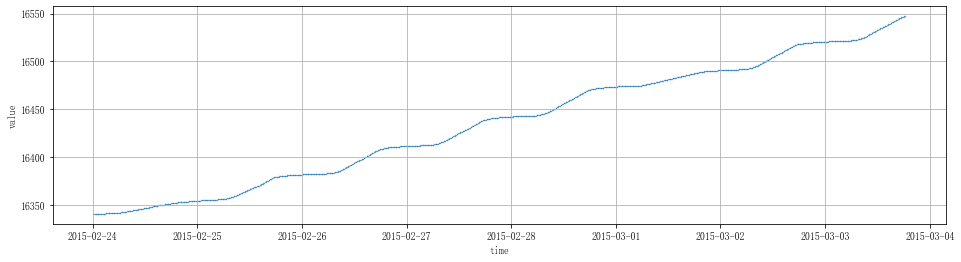

In [3]:
_=data.plot.scatter(figsize=(16,4),x="time",y="value",grid = True,s=0.1)

### 2 相邻两行记录数值差DataFrame



In [4]:
data_interval=data.diff()
data_interval.head(3)

,time,value
time,,
2015-02-24 00:10:00,NaT,NaN
2015-02-24 00:20:00,0 days 00:10:00,0.02
2015-02-24 00:30:00,0 days 00:10:00,0.03


重命名 data_interval的列

* 采样周期数值： `data_interval[interval]`
* 采样周期内能耗：`data_interval[power_interval]`

In [5]:
data_interval=data_interval.rename(columns={"time": "interval", "value": "power_interval"})
data_interval.head(3)

,interval,power_interval
time,,
2015-02-24 00:10:00,NaT,NaN
2015-02-24 00:20:00,0 days 00:10:00,0.02
2015-02-24 00:30:00,0 days 00:10:00,0.03


### 3 合并data和data_interval的DataFrame

In [6]:
merged_data = pd.merge(data,data_interval, left_index=True,right_index=True)
merged_data 

,time,value,interval,power_interval
time,,,,
2015-02-24 00:10:00,2015-02-24 00:10:00,16340.75,NaT,NaN
2015-02-24 00:20:00,2015-02-24 00:20:00,16340.77,0 days 00:10:00,0.02
2015-02-24 00:30:00,2015-02-24 00:30:00,16340.80,0 days 00:10:00,0.03
2015-02-24 00:40:00,2015-02-24 00:40:00,16340.83,0 days 00:10:00,0.03
2015-02-24 00:50:00,2015-02-24 00:50:00,16340.86,0 days 00:10:00,0.03
...,...,...,...,...
2015-03-03 17:40:00,2015-03-03 17:40:00,16546.44,0 days 00:10:00,0.21
2015-03-03 17:50:00,2015-03-03 17:50:00,16546.56,0 days 00:10:00,0.12
2015-03-03 18:00:00,2015-03-03 18:00:00,16546.76,0 days 00:10:00,0.20


**采样周期内能耗图**

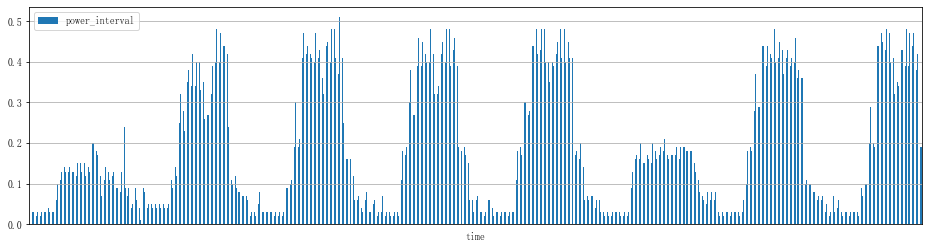

In [7]:
_=merged_data.plot.bar(figsize=(16,4),y="power_interval",grid = True,xticks=[])

## 2  数据采样统计

### 1 总样本数和采样天数

**总样本数**

In [8]:
data.count()

time     1118
value    1118
dtype: int64

**采样天数**

In [9]:
data["time"].max() - data["time"].min()

Timedelta('7 days 18:10:00')

### 2 最大、最小采样周期、能耗及时段

**最大、最小采样周期**

使用data_interval

In [10]:
max_interval=data_interval['interval'].max().total_seconds()/60
min_interval=data_interval['interval'].min().total_seconds()/60
print("最小采样周期(分钟)：", min_interval)    
print("最大采样周期(分钟)：", max_interval)  

最小采样周期(分钟)： 10.0
最大采样周期(分钟)： 10.0


**最大、最小采样周期内的能耗**

使用data_interval

In [11]:
max_power_interval=data_interval['power_interval'].max()
min_power_interval=data_interval['power_interval'].min()
print("采样周期内最大能耗：",max_power_interval)    
print("采样周期内最小能耗：",min_power_interval)  

采样周期内最大能耗： 0.5100000000020373
采样周期内最小能耗： 0.0


**最大、最小能耗采样时段**

使用`merged_data`

**查找采样能耗对应的采样时段函数**

In [12]:
def power_time_range(df,power_interval,interval):
    sample=df[df["power_interval"]==power_interval] 
    power_time_range= sample
    time_last= sample["time"]-pd.offsets.Minute(interval)
    for item in time_last:
        sample_last=df[df.index==item]
        power_time_range=pd.concat([power_time_range,sample_last])
    return power_time_range

In [13]:
min_power_time_range=power_time_range(merged_data,min_power_interval,min_interval)
min_power_time_range

,time,value,interval,power_interval
time,,,,
2015-02-24 19:50:00,2015-02-24 19:50:00,16352.7,0 days 00:10:00,0.00
2015-02-24 19:40:00,2015-02-24 19:40:00,16352.7,0 days 00:10:00,0.03


In [14]:
max_power_time_range=power_time_range(merged_data,max_power_interval,max_interval)
max_power_time_range

,time,value,interval,power_interval
time,,,,
2015-02-26 09:40:00,2015-02-26 09:40:00,16388.02,0 days 00:10:00,0.51
2015-02-26 16:50:00,2015-02-26 16:50:00,16406.02,0 days 00:10:00,0.51
2015-02-26 09:30:00,2015-02-26 09:30:00,16387.51,0 days 00:10:00,0.38
2015-02-26 16:40:00,2015-02-26 16:40:00,16405.51,0 days 00:10:00,0.37


##  3 基于时间索引的重采样能耗统计 

采样时间为index，使用**重采样**resample(时间周期)进行统计

* 这里,重采样周期resample(时间周期)类似于groupby(时间周期)

### 1 每日能耗

#### 1 每日能耗计算

重采样周期`resample(时间周期)`类似于`groupby(时间周期)`

如这里：
```python
max_day=data_time.resample("1d").max()
min_day=data_time.resample("1d").min()
```
等价于：

```python
max_day=data_time.groupby([data_time.index.month,data_time.index.day]).max() 
min_day=data_time.groupby([data_time.index.month,data_time.index.day]).min() 
```

In [15]:
max_day=data.resample("1d").max()
min_day=data.resample("1d").min()
power_day=max_day-min_day
power_day

,time,value
time,,
2015-02-24,0 days 23:40:00,13.62
2015-02-25,0 days 23:50:00,27.36
2015-02-26,0 days 23:50:00,29.62
2015-02-27,0 days 23:50:00,30.72
2015-02-28,0 days 23:50:00,31.37
2015-03-01,0 days 23:50:00,17.04
2015-03-02,0 days 23:50:00,29.77
2015-03-03,0 days 18:20:00,26.51


#### 2 每日能耗图

In [16]:
power_day["weekday"]= power_day.index.day_name()

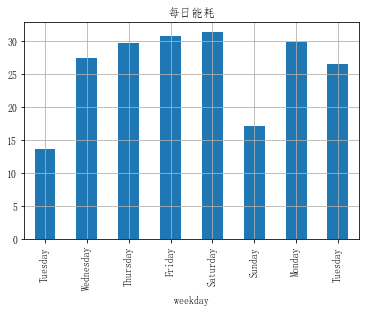

In [17]:
power_day.plot.bar(x="weekday",y="value",grid = True,legend=False)
_=plt.title("每日能耗")

#### 3 保存每日能耗

In [18]:
power_day.to_csv("./data/219_threePhaseIntelligentMeter_Day.csv")

In [19]:
# %load ./data/219_threePhaseIntelligentMeter_Day.csv

### 2 每小时能耗

#### 1 每小时能耗计算

重采样`resample("1h")

In [20]:
max_hour=data.resample("1h").max()
min_hour=data.resample("1h").min()
power_hour=max_hour-min_hour
stat_minutes=60
sample_minutes=(max_hour["time"]-min_hour["time"]).dt.seconds / stat_minutes
power_hour["value"]=power_hour["value"]*(stat_minutes/sample_minutes)
power_hour

,time,value
time,,
2015-02-24 00:00:00,0 days 00:40:00,0.165
2015-02-24 01:00:00,0 days 00:50:00,0.156
2015-02-24 02:00:00,0 days 00:50:00,0.156
2015-02-24 03:00:00,0 days 00:50:00,0.204
2015-02-24 04:00:00,0 days 00:50:00,0.180
...,...,...
2015-03-03 14:00:00,0 days 00:50:00,2.616
2015-03-03 15:00:00,0 days 00:50:00,2.652
2015-03-03 16:00:00,0 days 00:50:00,2.544


#### 2 每小时能耗图

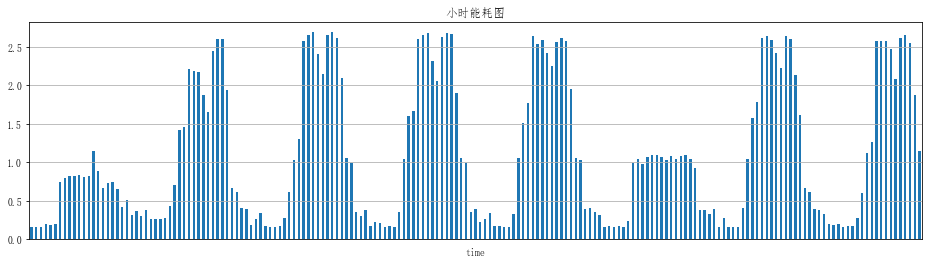

In [21]:
power_hour.plot.bar(figsize=(16,4),y="value",grid = True,legend=False,xticks=[])
_=plt.title("小时能耗图")

#### 3  每天小时能耗图

##### 1 加日期、小时、星期列

* weekday day hour

In [104]:
power_hour["day"]= power_hour.index.date
power_hour["hour"]= power_hour.index.hour
power_hour["weekday"]= power_hour.index.day_name()
power_hour.head(3)

,time,value,weekday,hour,day
time,,,,,
2015-02-24 00:00:00,0 days 00:40:00,0.165,Tuesday,0,2015-02-24
2015-02-24 01:00:00,0 days 00:50:00,0.156,Tuesday,1,2015-02-24
2015-02-24 02:00:00,0 days 00:50:00,0.156,Tuesday,2,2015-02-24


##### 2 指定某几天小时能耗对比图

In [106]:
import datetime
multidays=[datetime.date(2015,2,24),datetime.date(2015,2,25),datetime.date(2015,3,1)]
power_hour_multiday=power_hour[power_hour['day'].isin(multidays)].pivot_table(index= power_hour['hour'],
                                                                      columns='day', 
                                                                      values='value')
power_hour_multiday.head(3)

day,2015-02-24,2015-02-25,2015-03-01
hour,,,
0,0.165,0.384,0.156
1,0.156,0.264,0.168
2,0.156,0.264,0.156


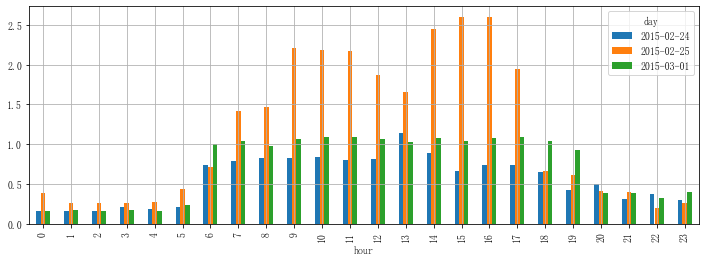

In [107]:
_=power_hour_multiday.plot.bar(figsize=(12,4),grid = True)

##### 3 指定星期几对比图

In [108]:
weekday="Tuesday"
power_hour_weekday=power_hour[power_hour['weekday']==weekday].pivot_table(index= power_hour['hour'],
                                                                      columns='day', 
                                                                      values='value')
power_hour_weekday.head(3)

day,2015-02-24,2015-03-03
hour,,
0,0.165,0.192
1,0.156,0.204
2,0.156,0.156


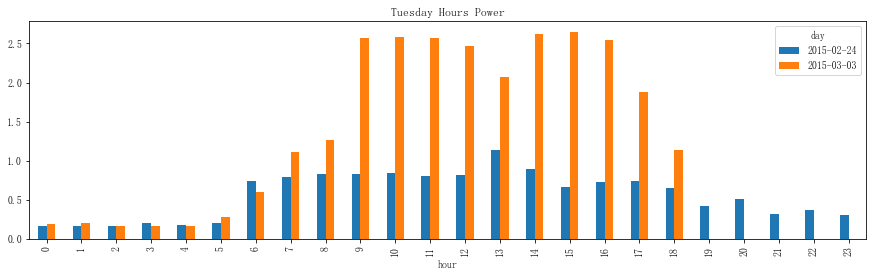

In [109]:
_ = power_hour_weekday.plot.bar(figsize=(15,4),title=f'{weekday} Hours Power')

##### 4 星期小时能耗图


In [70]:
power_hour_week=power_hour.pivot_table(index= power_hour['hour'],
                                        columns='weekday', 
                                        values='value',
                                        aggfunc='sum')
power_hour_week.head(3)

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
hour,,,,,,,
0,0.228,0.156,0.336,0.156,0.336,0.357,0.384
1,0.216,0.276,0.168,0.168,0.168,0.360,0.264
2,0.156,0.156,0.168,0.156,0.156,0.312,0.264


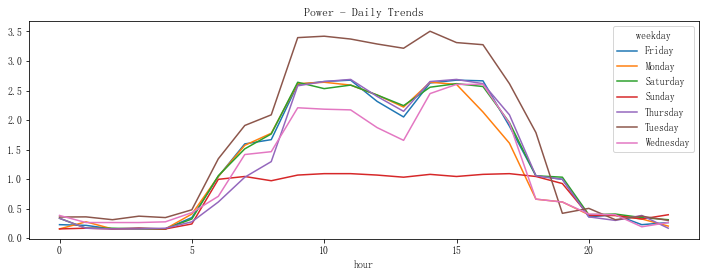

In [103]:
_ = power_hour_week.plot(figsize=(12,4),title='Power - Daily Trends')

### 3 日内时间段能耗

#### 1 日内时间段能耗计算

日内：时间段行的`resample("1D")`

In [24]:
hour_range={"start":8,"end":12}
hour_range_boolean=(merged_data.index.hour>=hour_range["start"])&(merged_data.index.hour<=hour_range["end"])
max_hours=merged_data.loc[hour_range_boolean].resample("1D").max()
min_hours=merged_data.loc[hour_range_boolean].resample("1D").min()
power_hours=max_hours-min_hours
power_hours.rename(columns = {'time':'time_period'}, inplace = True)
power_hours

,time_period,value,interval,power_interval
time,,,,
2015-02-24,0 days 04:50:00,3.97,0 days,0.03
2015-02-25,0 days 04:50:00,9.68,0 days,0.22
2015-02-26,0 days 04:50:00,11.24,0 days,0.33
2015-02-27,0 days 04:50:00,11.54,0 days,0.24
2015-02-28,0 days 04:50:00,11.76,0 days,0.23
2015-03-01,0 days 04:50:00,5.06,0 days,0.06
2015-03-02,0 days 04:50:00,11.75,0 days,0.23
2015-03-03,0 days 04:50:00,11.25,0 days,0.31


#### 2 日内时间段能耗图

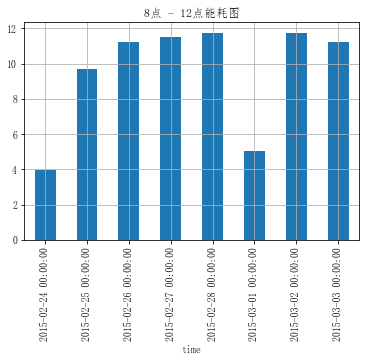

In [25]:
power_hours.plot.bar(y="value",grid = True,legend=False)
_=plt.title(f'{hour_range["start"]}点 - {hour_range["end"]}点能耗图')

#### 3 日内时间段能耗修正


#####  1 时段端点的时长差能耗修正函数

In [26]:
def add_power(data,hours,start_end):
    # 1 时段端点需补充的时长 minute_node
    if start_end=="start":
        minute_node=hours["time"].dt.minute
    elif start_end=="end":
        minute_node=59-hours["time"].dt.minute
    # 2 时段端点相邻采样点 
    minute_node_neighbor=hours["interval"]/ np.timedelta64(60, 's')
    # 3 时长差能耗修正
    add_power=hours["power_interval"]*(minute_node/minute_node_neighbor)
    return add_power                                        


##### 2 时长差能耗修正计算

In [27]:
add_power_start=add_power(merged_data,min_hours,"start")
add_power_end=add_power(merged_data,max_hours,"end")
power_hours["value"]=power_hours["value"]+add_power_start+add_power_end
power_hours

,time_period,value,interval,power_interval
time,,,,
2015-02-24,0 days 04:50:00,4.105,0 days,0.03
2015-02-25,0 days 04:50:00,10.058,0 days,0.22
2015-02-26,0 days 04:50:00,11.699,0 days,0.33
2015-02-27,0 days 04:50:00,11.981,0 days,0.24
2015-02-28,0 days 04:50:00,12.192,0 days,0.23
2015-03-01,0 days 04:50:00,5.249,0 days,0.06
2015-03-02,0 days 04:50:00,12.200,0 days,0.23
2015-03-03,0 days 04:50:00,11.691,0 days,0.31


##### 3 修正后的日内时段能耗图

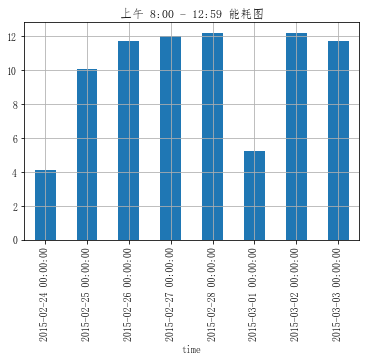

In [28]:
power_hours.plot.bar(y="value",grid = True,legend=False)
_=plt.title("上午 8:00 - 12:59 能耗图")